In the project, we'll be looking at individual income in the United States. The data is from the 1994 census, and contains information on an individual's **marital status**, **age**, **type of work**, and more. The target column, or what we want to predict, is whether individuals make less than or equal to 50k a year, or more than 50k a year.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)

In [2]:
income = pd.read_csv('/storage/emulated/\
0/DataQuest/Datasets/income.csv')


In [3]:
income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
high_income       object
dtype: object

In [5]:
#converting categorical variables

cat = income.dtypes[income.dtypes == 'object'].index
for var in cat:
    cat_num = pd.Categorical(income[var])
    income[var] = cat_num.codes

In [6]:
income

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [7]:
income

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [8]:
# A list of columns to train with
# We've already converted all columns to numeric
columns = ["age", "workclass", 
           "education_num", "marital_status",
           "occupation", "relationship", 
           "race", "sex", "hours_per_week",
           "native_country"]


In [9]:
# splitting dataset into training and testing set

from sklearn.model_selection import train_test_split
train, test = train_test_split(income)


In [10]:
# evaluating error with AUC

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

clf = DecisionTreeClassifier(random_state=1)
clf.fit(train[columns], train['high_income'])

y_predict = clf.predict(test[columns])

error = roc_auc_score(test['high_income'], y_predict)
print(error)


0.6888582504096231


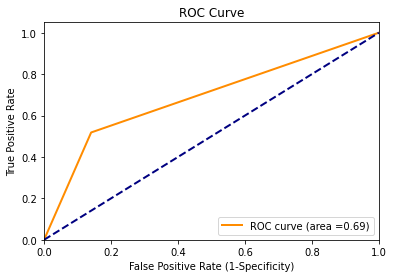

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(test['high_income'], y_predict, pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area =%.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The **AUC** for the predictions on testing set is about **0.7**. Let's now compare this with the **AUC** for predictions on the training set to see if the model is overfitting.

If the **AUC** between the training set predictions and the actual values is significantly higher than the **AUC** between the testing set predictions and the actual values, it is a sign that the model may be overfitting.

In [12]:
y_train_predict = clf.predict(train[columns])


In [13]:
error = roc_auc_score(train['high_income'], y_train_predict)
print (error)

0.9489670466270396


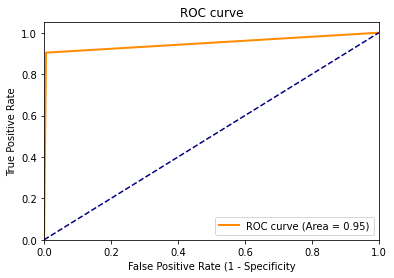

In [14]:
fpr, tpr, thresholds = roc_curve(train['high_income'], y_train_predict,
                                 pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (Area = %.2f)'%roc_auc)
plt.plot([0, 1], [0, 1], color='navy', ls='--')
plt.title('ROC curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate (1 - Specificity')
plt.ylabel('True Positive Rate')
plt.show()

### Reducing the overfitting

In [15]:
clf = DecisionTreeClassifier(min_samples_split=13, random_state=1)

clf.fit(train[columns], train['high_income'])

y_test_predict = clf.predict(test[columns])
y_train_predict = clf.predict(train[columns])

train_auc = roc_auc_score(train['high_income'], y_train_predict)
test_auc = roc_auc_score(test['high_income'], y_test_predict)

print (test_auc)
print (train_auc)


0.7004918332277162
0.8392938679766054


In [16]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_split=13, random_state=1)

clf.fit(train[columns], train['high_income'])

y_test_predict = clf.predict(test[columns])
y_train_predict = clf.predict(train[columns])

train_auc = roc_auc_score(train['high_income'], y_train_predict)
test_auc = roc_auc_score(test['high_income'], y_test_predict)

print (test_auc)
print (train_auc)


0.7394791077922598
0.7554550869392768


In [17]:
clf = DecisionTreeClassifier(max_depth=2, min_samples_split=100, random_state=1)

clf.fit(train[columns], train['high_income'])

y_test_predict = clf.predict(test[columns])
y_train_predict = clf.predict(train[columns])

train_auc = roc_auc_score(train['high_income'], y_train_predict)
test_auc = roc_auc_score(test['high_income'], y_test_predict)

print (test_auc)
print (train_auc)


0.6585472793601316
0.6617825652572741


### Introducing noise into the data to test for high variance. 

In [18]:
income_n = income.copy()

In [19]:
income_n['noise'] = np.random.randint(4, size=income_n.shape[0])


In [20]:
columns_n = ['noise', "age", "workclass", 
           "education_num", "marital_status",
           "occupation", "relationship", 
           "race", "sex", "hours_per_week",
           "native_country"]


In [21]:
train, test = train_test_split(income_n)

clf = DecisionTreeClassifier(random_state=1)
clf.fit(train[columns_n], train['high_income'])
y_train_predict = clf.predict(train[columns_n])
y_test_predict = clf.predict(test[columns_n])

train_error = roc_auc_score(train['high_income'], y_train_predict)
test_error = roc_auc_score(test['high_income'], y_test_predict)

print(train_error)
print(test_error)

0.9743568786737997
0.6992566618642823


# Random Forest: Concepts

Let's create two decision trees with slightly different parameters:

- One with `min_samples_leaf` set to 2

- One with `max_depth` set to 5

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train, test = train_test_split(income, test_size=0.3, random_state=1)

clf1 = DecisionTreeClassifier(min_samples_leaf = 2, random_state=1)
clf1.fit(train[columns], train['high_income'])

y_train_predict = clf1.predict(train[columns])
y_test_predict = clf1.predict(test[columns])

train_auc = roc_auc_score(train['high_income'], y_train_predict)
test_auc = roc_auc_score(test['high_income'], y_test_predict)

#print(train_auc)
print(test_auc)


0.7011762950317696


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train, test = train_test_split(income, test_size=0.3, random_state=1)

clf2 = DecisionTreeClassifier(max_depth = 5, random_state=1)
clf2.fit(train[columns], train['high_income'])

y_train_predict = clf2.predict(train[columns])
y_test_predict = clf2.predict(test[columns])

train_auc = roc_auc_score(train['high_income'], y_train_predict)
test_auc = roc_auc_score(test['high_income'], y_test_predict)

#print(train_auc)
print(test_auc)


0.6777989011218585


### Making ensemble predictions

In [24]:
y1_test_predict = clf1.predict_proba(test[columns])[:, 1]

y2_test_predict = clf2.predict_proba(test[columns])[:, 1]

In [25]:
combined = (y1_test_predict + y2_test_predict)/2

rounded_predict = np.round(combined)

test_auc = roc_auc_score(test['high_income'], rounded_predict)
print(test_auc)

0.72819935595355


Our **auc** score is now boosted and well better than either of the two previous score. It is important to mention that it is not merely the average of the errors but way better than it

# Bagging

We are going to build **10** trees, where each bag will contain **60%** of the original rows.

In [26]:
n_trees = 10

predictions = list()

for i in range(n_trees):
    
    bag = train.sample(frac=0.6, replace=True, random_state=i)
    
    # instantiate a classifier
    clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=2)
    clf.fit(bag[columns], bag['high_income'])
    
    # make predictions
    test_predict = clf.predict_proba(test[columns])[:, 1]
    predictions.append(test_predict)

avg_predictions = np.sum(predictions, axis=0)/10
rounded = np.round(avg_predictions)


test_error = roc_auc_score(test['high_income'], rounded)
print (test_error)


0.7444624540020116


### Bagging and random subsets

We can also repeat our random subset selection process in scikit-learn. We just set the `splitter` parameter on `DecisionTreeClassifier` to **"random"**, and the `max_features` parameter to **"auto"**. If we have N columns, this will pick a subset of features of size √N, compute the Gini coefficient for each (this is similar to information gain), and split the node on the best column in the subset.

In [27]:
n_trees = 10

predictions = list()

for i in range(n_trees):
    
    bag = train.sample(frac=0.6, replace=True, random_state=i)
    
    # instantiate a classifier
    clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=2,
                                splitter='random',max_features='auto')
    clf.fit(bag[columns], bag['high_income'])
    
    # make predictions
    test_predict = clf.predict_proba(test[columns])[:, 1]
    predictions.append(test_predict)

avg_predictions = np.sum(predictions, axis=0)/10
rounded = np.round(avg_predictions)


test_error = roc_auc_score(test['high_income'], rounded)
print (test_error)


0.7466559723519633


# Random Forest: Using Sci-kit Learn

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=5, min_samples_leaf=2, random_state=1)
clf.fit(train[columns], train['high_income'])

predictions = clf.predict(test[columns])

error_score = roc_auc_score(test['high_income'], predictions)
print(error_score)


0.7445141448477777


Let's increase the `n_estimators` parameter to **150** and observe our results

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, min_samples_leaf=2, random_state=1)
clf.fit(train[columns], train['high_income'])

predictions = clf.predict(test[columns])

error_score = roc_auc_score(test['high_income'], predictions)
print(error_score)


0.7539883725441626


In [34]:
clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=5)

clf.fit(train[columns], train["high_income"])

train_predictions = clf.predict(train[columns])
print(roc_auc_score(train['high_income'], train_predictions))

test_predictions = clf.predict(test[columns])
print(roc_auc_score(test["high_income"], test_predictions))

0.81847643016546
0.7306407933888244


We can see that the **test auc** is much lower than the **train auc**. This indicates that the model is overfitting. Lets now train a similar random forest model and contrast it with the above.

In [31]:
clf = RandomForestClassifier(n_estimators=150, random_state=1, min_samples_leaf=5)

clf.fit(train[columns], train["high_income"])

train_predictions = clf.predict(train[columns])
print(roc_auc_score(train['high_income'], train_predictions))

test_predictions = clf.predict(test[columns])
print(roc_auc_score(test["high_income"], test_predictions))

0.793792275831262
0.7610768826719273


This shows that overfitting decreased with `Random Forest` and accuracy went up overall. 